In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\Mandakini\\Downloads\\titan.csv")
df=df.iloc[0:-7]
removecolumns=[0,1,2,10,11,12,13,14]
df=df.drop(df.columns[removecolumns],axis=1)
df.head()
data_matrix=df.to_numpy()
column6_index=5
column7_index=6
data_matrix[ :,[column6_index,column7_index]]=data_matrix[ :,[column7_index,column6_index]]
print(data_matrix.shape)
print(data_matrix[:5, :])

(56, 7)
[['3,284.65' '3,272.65' '3,291.50' '3,244.00' '3,260.00' '3,264.55'
  '3,266.20']
 ['3,266.20' '3,246.20' '3,274.95' '3,209.70' '3,219.95' '3,241.11'
  '3,219.75']
 ['3,219.75' '3,216.00' '3,236.30' '3,179.00' '3,190.00' '3,208.21'
  '3,187.85']
 ['3,187.85' '3,160.35' '3,189.90' '3,092.05' '3,106.00' '3,127.11'
  '3,100.80']
 ['3,100.80' '3,095.10' '3,138.75' '3,087.25' '3,120.00' '3,118.26'
  '3,120.70']]


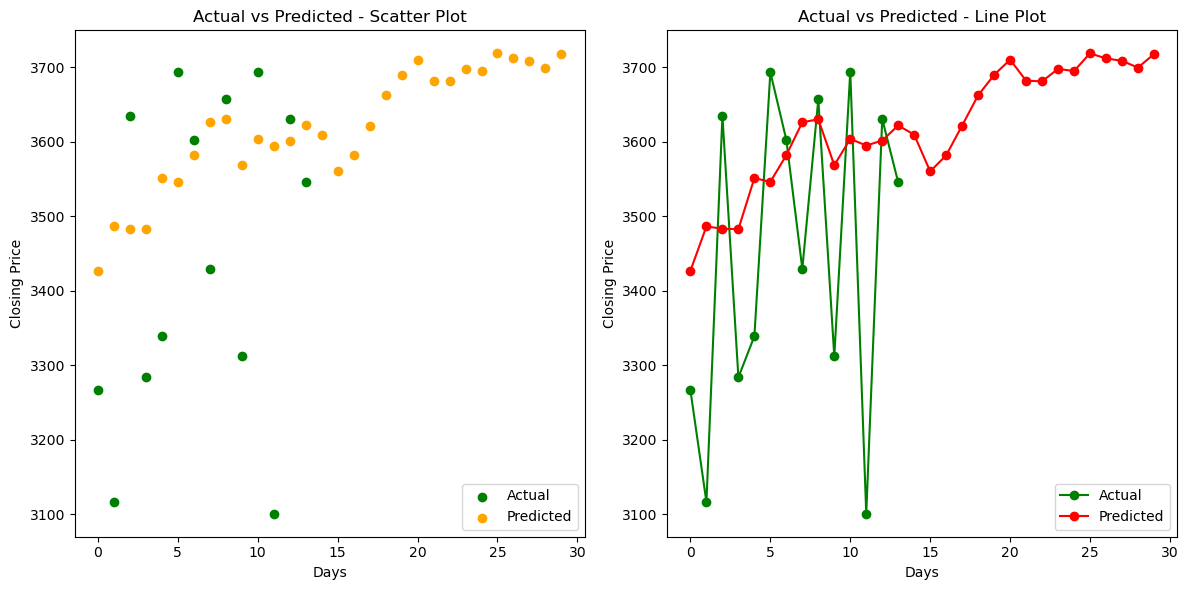

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Converting to Pandas DataFrame
columns = ['Prev_Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Close']
df = pd.DataFrame(data_matrix, columns=columns)

# Data Cleaning
for col in columns:
    if df[col].dtype == 'O': 
        df[col] = df[col].str.replace(',', '').astype(float)

# Separate independent variables (X) and dependent variable (y)
X = df.iloc[:, :-1].values  # Independent var
y = df.iloc[:, -1].values   # Dependent var

# Split the dataset into training and testing sets (90/10 split)
X_train, X_test, y_train, y_test = train_test_split(X[:90, :], y[:90], test_size=0.25, random_state=42)

# Train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model on the remaining 30 days
y_pred = model.predict(X[-30:, :])

# Plotting predicted vs actual data
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test[-30:])), y_test[-30:], label='Actual', color='green')
plt.scatter(range(len(y_pred[-30:])), y_pred[-30:], label='Predicted', color='orange')
plt.title('Actual vs Predicted - Scatter Plot')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

# Line plot
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test[-30:])), y_test[-30:], label='Actual', marker='o',color='green')
plt.plot(range(len(y_pred[-30:])), y_pred[-30:], label='Predicted', marker='o',color='red')
plt.title('Actual vs Predicted - Line Plot')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Prediction function
def predict_closing_price(prev_close, open_price, high, low, last, vwap):
    input_data = np.array([[prev_close, open_price, high, low, last, vwap]])
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage of the prediction function
inp = [float(input(f"Enter {column}: ")) for column in columns[:-1]]
predicted_closing_price = predict_closing_price(*inp)

print(f"Predicted Closing Price: {predicted_closing_price}")